In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###STEP2###
def convert_data_to_timeseries(input_file, column, verbose=False):
    # 导入数据
    data = np.loadtxt(input_file, delimiter=',')
    # 确定索引的开始与结束时间
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))
    ###问题一：完善函数###
    ###提示：通过pandas的date_range函数获取索引###

    #拿出指定列的数据
    data1 = np.array(data)
    data_value=data1[:,column]

    data_time_index = pd.date_range(start=start_date, end=end_date, freq='M')
    data_timeseries=pd.Series(data_value,index=data_time_index)
    #返回两个序列
    return data_timeseries


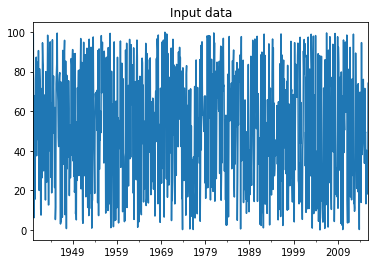

In [2]:
###STEP3###
# 文件路径
input_file = '02data.txt'
column_num = 2
data_timeseries = convert_data_to_timeseries(input_file, column_num)
# Plot方法成图
data_timeseries.plot()
plt.title('Input data')
plt.show()


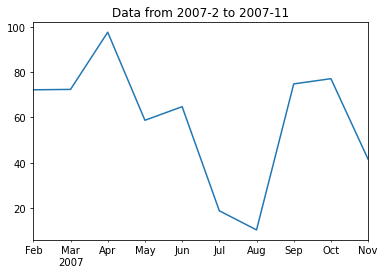

In [3]:
# 图像太密集了，我们换一个时间范围
start = '2007-2'
end = '2007-11'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)
plt.show()

Text(0.5, 1.0, 'Data overlapped on top of each other')

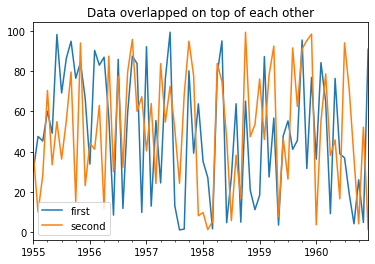

In [4]:
###STEP4###
###问题二：将数据的第三,四列转换为二维数据结构dataframe,索引为时间###
column_num = 3
data_timeseries4 = convert_data_to_timeseries(input_file, column_num)

dataframe=pd.concat([data_timeseries,data_timeseries4],axis=1,ignore_index=False)
dataframe=dataframe.rename(columns={0:"first",1:"second"})
    
# 将两组数据同时成图
dataframe['1955':'1960'].plot()
plt.title('Data overlapped on top of each other')


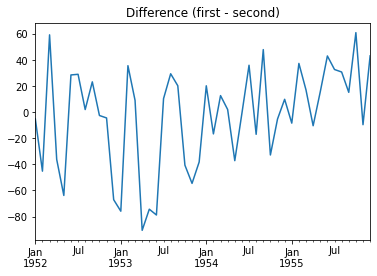

In [5]:
###STEP5###
# 查看两组数据是否有线性关联
plt.figure()
difference = dataframe['1952':'1955']['first'] - dataframe['1952':'1955']['second']
difference.plot()
plt.title('Difference (first - second)')
plt.show()


In [6]:
###STEP6###
###问题三：请统计两组数组的最大最小值和均值###
###问题三：计算数据的相关系数，调用corr函数###
print("Maximum:")
print(dataframe.max())
print("\nMinimum:")
print(dataframe.min())
print("\nMean:")
print(dataframe.mean())
print("\nCorrelation coefficients:")
print(dataframe.corr())


Maximum:
first     99.82
second    99.97
dtype: float64

Minimum:
first     0.07
second    0.00
dtype: float64

Mean:
first     51.264529
second    49.695417
dtype: float64

Correlation coefficients:
           first    second
first   1.000000  0.077607
second  0.077607  1.000000


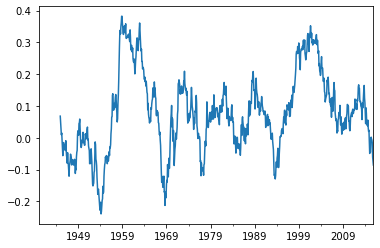

In [7]:
###STEP7###
# 打印两组数据相关性
plt.figure()
correlation = dataframe['first'].rolling(60).corr(dataframe['second'])
correlation.plot()
plt.show()